## 1. Introduction

        On this project we are analizing UFRN's expensenses on constructions and renovations.
    
        We intend to analize *how much* and *when* the money destined for these constructions were expended and if there is any unfinished or abandoned projects.
    
    
    
## 2. Knowing Your Files

        It's very important to have a first contact with the data that we are working on.
        
        So, in order to do that, we first need to import a library called *"pandas"* and use it to open and read our database file. 
    

In [1]:
# Importing pandas library
import pandas as pd

# Utilizing the 'read_csv' function of pandas in order to read the file named as 'obras.csv'
obras = pd.read_csv("obras.csv",sep=";")

#Printing the 5 first lines of 'obras'
obras.head()

,id_obra,descricao,periodo,qtd_dias,status_obra,licitacao,empresa,modalidade,valor,fonte_recurso,vigencia_projeto,projeto,id_unidade_responsavel,unidade_responsavel,Unnamed: 14
0,493,CONSTRUÇÃO DO BLOCO H DO SETOR DE AULAS TEÓRIC...,23/03/2005 - 19/11/2005,240,FINALIZADA,6/2004,03.166.687/0001-28 - CRS-CONSTRUÇÕES E EMPREE...,CONCORRÊNCIA,"R$ 829.454,21",NaN,NaN,NaN,NaN,NaN,NaN
1,521,CONSTRUÇÃO DO BLOCO A1 DO SETOR DE AULAS TEÓRI...,04/05/2005 - 30/12/2005,240,FINALIZADA,7/2004,03.166.687/0001-28 - CRS-CONSTRUÇÕES E EMPREE...,CONCORRÊNCIA,"R$ 833.702,12",NaN,20/04/2005 - 20/11/2005,19O ENECIC/2005 (852005),NaN,NaN,NaN
2,848,CONSTRUÇÃO DO SETOR DE ANTIBIÓTICOS PRODUÇÃO D...,02/06/2005 - 29/01/2006,240,FINALIZADA,4/2004,03.722.669/0001-85 - CONSTRUTORA CAGEO LTDA,CONCORRÊNCIA,"R$ 1.561.230,93",TESOURO - EDUCAÇÃO (112000000),NaN,NaN,252.0,NUCLEO DE PESQUISA EM ALIMENTOS E MEDICAMENTOS,NaN
3,925,Complementação da 2ª Etapa e Realização da 3ª ...,28/01/2005 - 22/01/2006,360,FINALIZADA,2/2004,40.761.454/0001-08 - AR PROJETOS & CONSTRUÇÕE...,CONCORRÊNCIA,"R$ 814.550,74",NaN,20/12/2002 - 31/07/2007,UFRN/CONV.133/02 - HUOL (862003),446.0,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,NaN
4,182,CONSTRUÇÃO DO DEPARTAMENTO DE FISIOTERAPIA - CCS,08/02/2006 - 02/02/2007,360,FINALIZADA,1/2005,01.694.415/0001-75 - HASTE-HABITAÇÃO E SERVIÇ...,CONCORRÊNCIA,"R$ 1.455.865,61",NaN,20/12/2004 - 30/03/2010,CONVENIO 121/2004 UFRN (732005),446.0,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,NaN


## 3. Cleaning the data

        As can be observed, we have a lot of data that is in an unwanted format, so now we need to filter them in order to get just what we need to work on. 

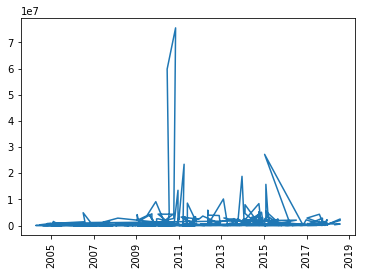

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

obras = pd.read_csv("obras.csv",sep=";")

#linpando a coluna 'valor'
values = []
for i in obras.valor:
    i = i.split(" ")
    i = i[-1]
    i = i.replace('.','')
    i = i.replace(',','.')
    i = float(i)
    values.append(i)
    
obras['valor'] = pd.DataFrame(values)

#criando nova coluna 'years'
years = []
for i in obras.periodo:
    i = i.split(' ')[0]
    years.append(i)

years = pd.to_datetime(years)

plt.plot(years,obras['valor'])
plt.xticks(rotation=90)
plt.show()